<h1> 2.Words as Features - SENTIMENT </h2>

<p> AUTHORS: </p>

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import plot_confusion_matrix

import gzip
import json
import collections
# jsonfiledirectory = "/Users/rosiers/Documents/GitHub/472-assignment1/goemotions.json.gz"
jsonfiledirectory = "C:\\Users\\Krish\\.vscode\\472-assignment1\\goemotions.json.gz"
# jsonfiledirectory = "C:\\Users\\p_ishna\\Downloads\\goemotions.json.gz"

with gzip.open(jsonfiledirectory, "r") as f:
    data = json.loads(f.read().decode("utf-8"))

<h3> Size of the vocabulary </h3>

In [3]:
strings = []
sentiment = []
for item in data:
    strings.append(item[0])
    sentiment.append(item[2])

vectorizer = CountVectorizer()
# vectorizer.fit(strings)
# print(vectorizer.vocabulary_)
# tokenize and build vocab
v_fit = vectorizer.fit_transform(strings)
#v_fit = vectorizer.transform(strings)

print(v_fit.shape)


(171820, 30449)


<h3>2.2 Split Dataset </h3>

In [4]:
# Comment out depending on which classification you are running

# SENTIMENTS
X_train, X_test, y_train, y_test = train_test_split(v_fit, sentiment, test_size=0.2)


<h3> 2.3 Classifiers - SENTIMENTS </h3>

<h4>BASE-MNB</h4>

In [5]:
sent_base_mnb = MultinomialNB()
sent_base_mnb.fit(X_train,y_train)
print("Base-MNP: ")
print(sent_base_mnb.score(X_test,y_test))

Base-MNP: 
0.5479280642532883


<h4>BASE - DT</h4>

In [60]:
sent_dtc = DecisionTreeClassifier()
sent_dtc.fit(X_train, y_train)
print("Base-DT: ")
print(sent_dtc.score(X_test, y_test))

Base-DT: 
0.5447852403678268


<h4> BASE-MLP</h4>

In [62]:
sent_p = MLPClassifier(max_iter=2)
sent_p.fit(X_train,y_train)
print("Base-MLP: ")
print(sent_p.score(X_test,y_test))

Base-MLP: 
0.5701897334419742


C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(


<h4>TOP-MNB<H4>

In [64]:
sent_nb = MultinomialNB()
params_nb = {
    "alpha" : [0.0, 0.5, 10.0, 20.0]
}

sent_nb_grid = GridSearchCV(sent_nb, params_nb)
sent_nb_grid.fit(X_train, y_train)
print('best parameters:')
print(sent_nb_grid.best_params_)
print("TOP-MNB: ")
print(sent_nb_grid.score(X_test, y_test))


C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


best parameters:
{'alpha': 0.5}
TOP-MNB: 
0.5458037481084856


<h4>TOP-DT</h4>

In [66]:
sent_tdt = DecisionTreeClassifier()

params_dt = {
    "criterion" : ['gini','entropy'],
    "max_depth" : [2,10],
    "min_samples_split" : [2,10,40]
}
sent_dt_grid = GridSearchCV(
    estimator=sent_tdt,
    param_grid= params_dt
)
sent_dt_grid = sent_dt_grid.fit(X_train, y_train)
print('best parameters:')
print(sent_dt_grid.best_params_)
print("TOP-DT: ")
print(sent_dt_grid.score(X_test, y_test))

best parameters:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10}
TOP-DT: 
0.4320509835874753


<h4>TOP-MLP</h4>

In [68]:
sent_mlp = MLPClassifier(max_iter=1)

params_mlp = {
    'activation' : ['sigmoid', 'tanh', 'relu', 'identity'],
    'hidden_layer_sizes': [(10,10,10), (30,50)],
    'solver': ['sgd', 'adam'] 
}

sent_mlp_grid = GridSearchCV(sent_mlp,params_mlp,n_jobs=-1)
sent_mlp_grid.fit(X_train, y_train)
print('best parameters:')
print(sent_mlp_grid.best_params_) 
print("TOP-MLP: ")
print(sent_mlp_grid.score(X_test, y_test))

C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 762, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_net

best parameters:
{'activation': 'relu', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}
TOP-MLP: 
0.5680945175183332


C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


<H3>2.4 Classification Reports</h3>

<h4>BASE-MNB - SENTIMENT</h4>

C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


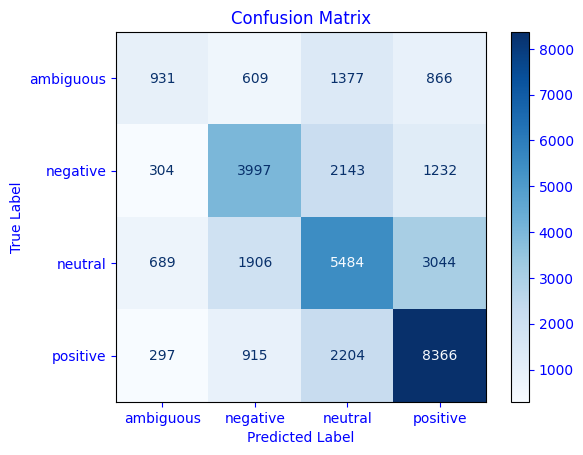

In [58]:
mnb_sent_pred = sent_base_mnb.predict(X_test)
sent_cm_mnb = confusion_matrix(y_test, mnb_sent_pred)

color = 'blue'
matrix = plot_confusion_matrix(sent_base_mnb, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

# with open ('performance.txt', 'a') as f: 
#     f.write("MODEL: base-MNB || PARAMS: ? || TASK: sentiment")
#     f.write('\n')
#     f.write("CONFUSION MATRIX")
#     f.write('\n')
#     sent_mnb_content = str(sent_cm_mnb)
#     f.write(sent_mnb_content)
#     f.write('\n')
#     f.write('\n')
#     f.write('CLASSIFICATION REPORT')
#     f.write('\n')
#     f.write(classification_report(y_test, mnb_sent_pred))
#     f.write('\n')

print(classification_report(y_test, mnb_sent_pred))

<h4>BASE-DT - SENTIMENT</h4>

C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


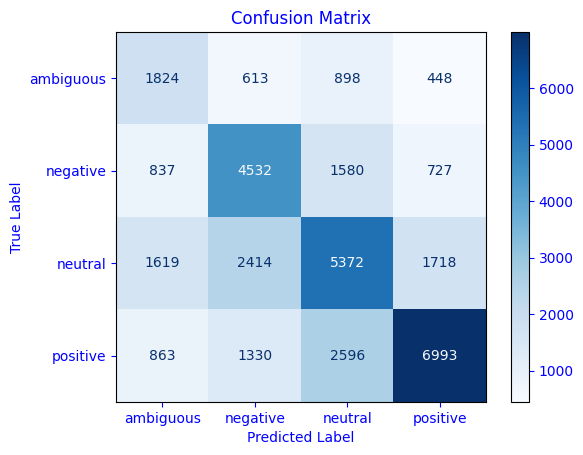

In [61]:
dtc_sent_pred = sent_dtc.predict(X_test)
sent_cm_dtc = confusion_matrix(y_test, dtc_sent_pred)

color = 'blue'
matrix = plot_confusion_matrix(sent_dtc, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

# with open ('performance.txt', 'a') as f: 
#     f.write("MODEL: base-DT || PARAMS: ? || TASK: sentiment")
#     f.write('\n')
#     f.write("CONFUSION MATRIX")
#     f.write('\n')
#     sent_dtc_content = str(sent_cm_dtc)
#     f.write(sent_dtc_content)
#     f.write('\n')
#     f.write('\n')
#     f.write('CLASSIFICATION REPORT')
#     f.write('\n')
#     f.write(classification_report(y_test, dtc_sent_pred))
#     f.write('\n')

print(classification_report(y_test, dtc_sent_pred))

<h4>BASE-MLP - SENTIMENT</h4>

C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


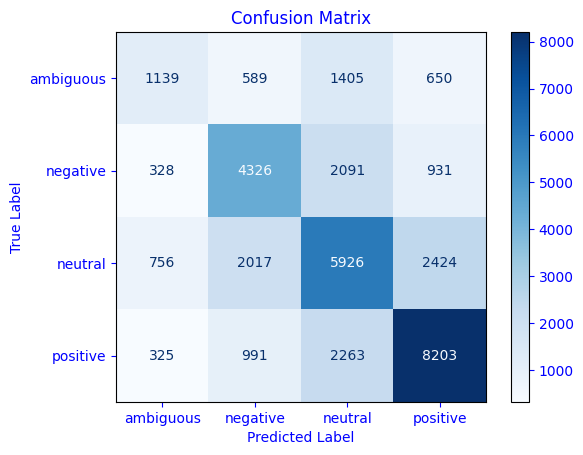

In [63]:
mlp_sent_pred = sent_p.predict(X_test)
sent_cm_mlp = confusion_matrix(y_test, mlp_sent_pred)

color = 'blue'
matrix = plot_confusion_matrix(sent_p, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

# with open ('performance.txt', 'a') as f: 
#     f.write("MODEL: base-MLP || PARAMS: ? || TASK: sentiment")
#     f.write('\n')
#     f.write("CONFUSION MATRIX")
#     f.write('\n')
#     sent_mlp_content = str(sent_cm_mlp)
#     f.write(sent_mlp_content)
#     f.write('\n')
#     f.write('\n')
#     f.write('CLASSIFICATION REPORT')
#     f.write('\n')
#     f.write(classification_report(y_test, mlp_sent_pred))
#     f.write('\n')

print(classification_report(y_test, mlp_sent_pred))

<h4>TOP-MNB - SENTIMENT</h4>

C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


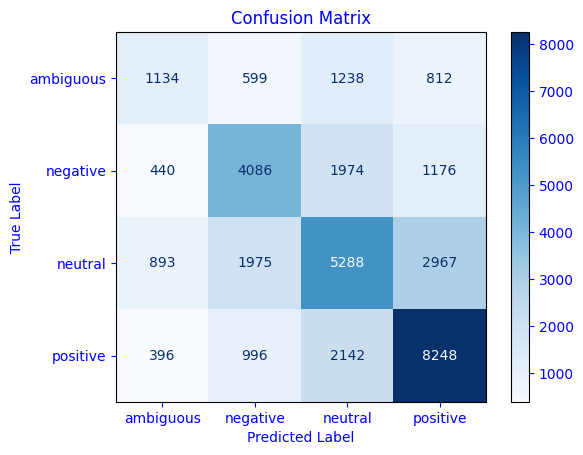

In [65]:
tnb_sent_pred = sent_nb_grid.predict(X_test)
sent_cm_tnb = confusion_matrix(y_test, tnb_sent_pred)

color = 'blue'
matrix = plot_confusion_matrix(sent_nb_grid, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

# with open ('performance.txt', 'a') as f: 
#     f.write("MODEL: top-MNB || PARAMS: {'alpha': 0.5} || TASK: sentiment")
#     f.write('\n')
#     f.write("CONFUSION MATRIX")
#     f.write('\n')
#     sent_tnb_content = str(sent_cm_tnb)
#     f.write(sent_tnb_content)
#     f.write('\n')
#     f.write('\n')
#     f.write('CLASSIFICATION REPORT')
#     f.write('\n')
#     f.write(classification_report(y_test, tnb_sent_pred))
#     f.write('\n')

print(classification_report(y_test, tnb_sent_pred))

<h4>TOP-DT - SENTIMENT</h4>

C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


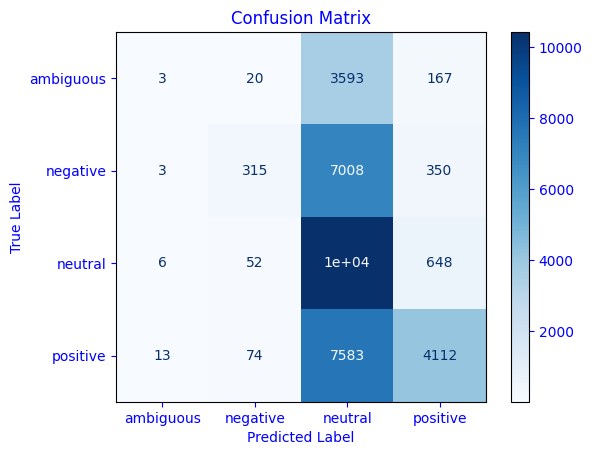

In [67]:
dt_sent_pred = sent_dt_grid.predict(X_test)
sent_cm_dt = confusion_matrix(y_test, dt_sent_pred)

color = 'blue'
matrix = plot_confusion_matrix(sent_dt_grid, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

# with open ('performance.txt', 'a') as f: 
#     f.write("MODEL: top-DT || PARAMS: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10} || TASK: sentiment")
#     f.write('\n')
#     f.write("CONFUSION MATRIX")
#     f.write('\n')
#     sent_dt_content = str(sent_cm_dt)
#     f.write(sent_dt_content)
#     f.write('\n')
#     f.write('\n')
#     f.write('CLASSIFICATION REPORT')
#     f.write('\n')
#     f.write(classification_report(y_test, dt_sent_pred))
#     f.write('\n')

print(classification_report(y_test, dt_sent_pred))

<h4>TOP-MLP - SENTIMENT</h4>

C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


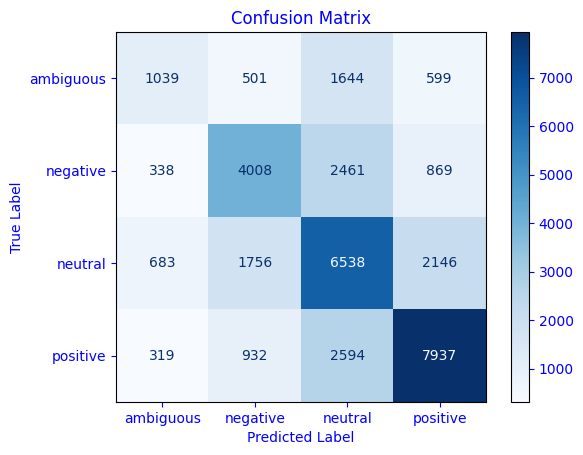

In [69]:
mlp_sent_pred = sent_mlp_grid.predict(X_test)
sent_cm_mlp = confusion_matrix(y_test, mlp_sent_pred)

color = 'blue'
matrix = plot_confusion_matrix(sent_mlp_grid, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

# with open ('performance.txt', 'a') as f: 
#     f.write("MODEL: top-MLP || PARAMS: {'activation': 'relu', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'} || TASK: sentiment")
#     f.write('\n')
#     f.write("CONFUSION MATRIX")
#     f.write('\n')
#     sent_mlp_content = str(sent_cm_mlp)
#     f.write(sent_mlp_content)
#     f.write('\n')
#     f.write('\n')
#     f.write('CLASSIFICATION REPORT')
#     f.write('\n')
#     f.write(classification_report(y_test, mlp_sent_pred))
#     f.write('\n')

print(classification_report(y_test, mlp_sent_pred))

<h3>2.5 Own Exploration</h3>

Use tf-idf instead of word frequencies and redo all substeps of 2.3 above – you can use TfidfTransformer for this. Display the results of this experiment.

In [24]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tvectorizer = TfidfVectorizer()
# tokenize and build vocab
v_fit = tvectorizer.fit_transform(strings)
X_train, X_test, y_train, y_test = train_test_split(v_fit, sentiment, test_size=0.2)

In [25]:
sent_base_mnb = MultinomialNB()
sent_base_mnb.fit(X_train,y_train)
print("Base-MNP: ")
print(sent_base_mnb.score(X_test,y_test))

Base-MNP: 
0.3455360260737982


In [26]:
sent_dtc = DecisionTreeClassifier()
sent_dtc.fit(X_train, y_train)
print("Base-DT: ")
print(sent_dtc.score(X_test, y_test))

Base-DT: 
0.35729251542311724


In [27]:
sent_p = MLPClassifier(max_iter=2)
sent_p.fit(X_train,y_train)
print("Base-MLP: ")
print(sent_p.score(X_test,y_test))

Base-MLP: 
0.443196368292399


/Users/rosiers/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(


In [29]:
sent_nb = MultinomialNB()
params_nb = {
    "alpha" : [0.0, 0.5, 10.0, 20.0]
}

sent_nb_grid = GridSearchCV(sent_nb, params_nb)
sent_nb_grid.fit(X_train, y_train)
print('best parameters:')
print(sent_nb_grid.best_params_)
print("TOP-MNB: ")
print(sent_nb_grid.score(X_test, y_test))

/Users/rosiers/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/rosiers/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/rosiers/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/rosiers/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/rosiers/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in nu

best parameters:
{'alpha': 0.0}
TOP-MNB: 
0.38610173437318124


/Users/rosiers/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


In [30]:
sent_tdt = DecisionTreeClassifier()

params_dt = {
    "criterion" : ['gini','entropy'],
    "max_depth" : [2,10],
    "min_samples_split" : [2,10,40]
}
sent_dt_grid = GridSearchCV(
    estimator=sent_tdt,
    param_grid= params_dt
)
sent_dt_grid = sent_dt_grid.fit(X_train, y_train)
print('best parameters:')
print(sent_dt_grid.best_params_)
print("TOP-DT: ")
print(sent_dt_grid.score(X_test, y_test))

best parameters:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}
TOP-DT: 
0.39439529740426027


In [31]:
sent_mlp = MLPClassifier(max_iter=1)

params_mlp = {
    'activation' : ['sigmoid', 'tanh', 'relu', 'identity'],
    'hidden_layer_sizes': [(10,10,10), (30,50)],
    'solver': ['sgd', 'adam']
}

sent_mlp_grid = GridSearchCV(sent_mlp,params_mlp,n_jobs=-1)
sent_mlp_grid.fit(X_train, y_train)
print('best parameters:')
print(sent_mlp_grid.best_params_)
print("TOP-MLP: ")
print(sent_mlp_grid.score(X_test, y_test))

/Users/rosiers/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/rosiers/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/rosiers/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 762, in fit
    return self._fit(X, y, incremental=False)
  File "/Users/rosiers/Libra

best parameters:
{'activation': 'identity', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}
TOP-MLP: 
0.4250378302875102


/Users/rosiers/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
